In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
sys.path.insert(1, os.sep.join(["..", "packages"]))
from Levy_processes import *
from basicDistributionFunctions import equantile, equantile_list



In [9]:
Image_width = 10

/tmp/ipykernel_13530/574445783.py:27: RuntimeWarning: invalid value encountered in multiply
  Quantile_teoretic[j,:] = Quantile_teoretic[j,:] * np.sqrt(T * j / M)


IndexError: index 9 is out of bounds for axis 1 with size 2

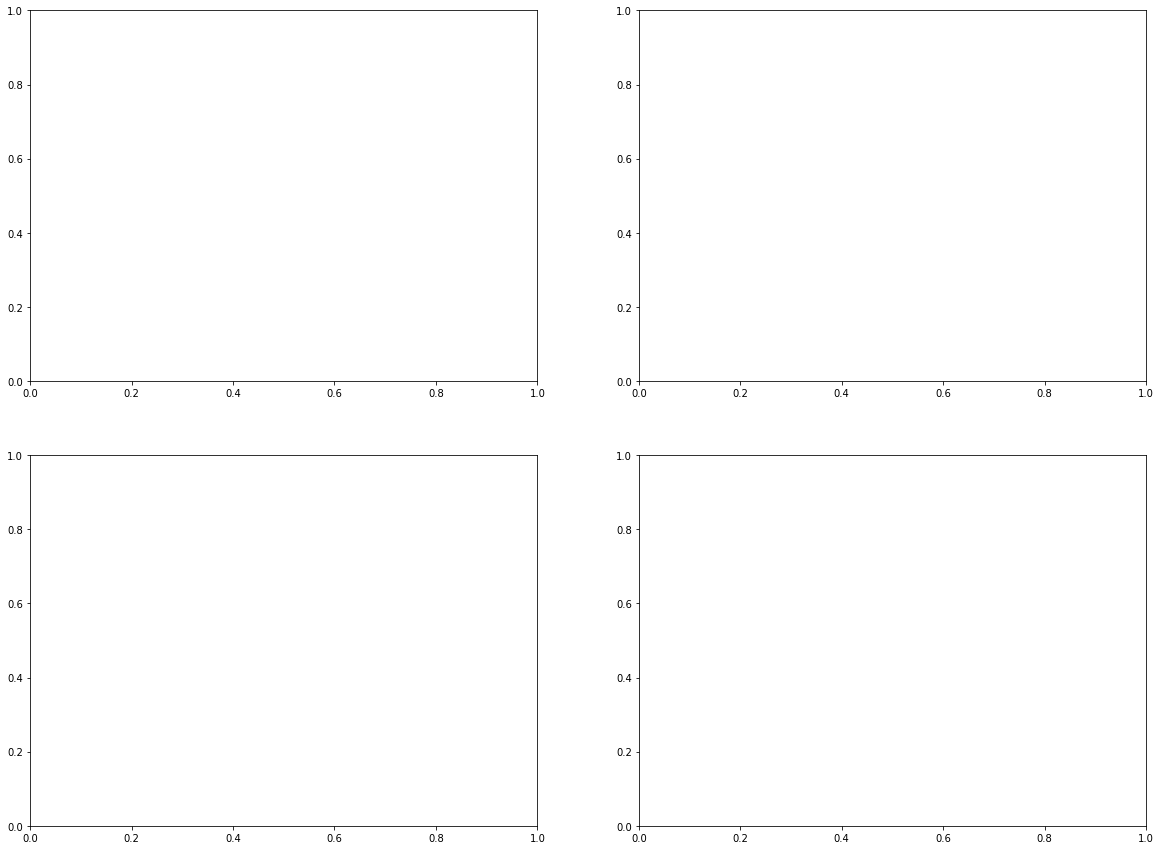

In [10]:
Alphas = [0.25, 0.5, 1, 1.5]
Betas = [-0.5, 0, 0.5]
Alphas = [1.5, 2]
Betas = [0,1/2]
T = 1
M = 10 ** 1
N = 1000
t = np.linspace(0, 1, N)
t_q = np.linspace(0, 1, M)

# fig, axs = plt.subplots(nrows = len(Alphas), ncols = len(Betas), figsize = (2 * Image_width, 1.5 * Image_width))
fig_q, axs_q = plt.subplots(nrows = len(Alphas), ncols = len(Betas), figsize = (2 * Image_width, 1.5 * Image_width))
for i, alpha in enumerate(Alphas):
    for j, beta in enumerate(Betas):
        Quantile = np.zeros([M, N])

        Quantile_teoretic = np.zeros([M,N])
        # for i in range()
        X = Levy_prcesses(T, M, N, alpha, beta)

        for k in range(N):
            Quantile[:,k] = equantile_list(X[k,:])
        for k in range(N):
            Quantile_teoretic[:,k] = np.squeeze(np.ones([M, 1]) * norm.ppf(k / N))
            
        for j in range(M):
            Quantile_teoretic[j,:] = Quantile_teoretic[j,:] * np.sqrt(T * j / M)
        
        # ax = axs[i, j]
        # ax.plot(t, X)
        # ax.set_title(f"Alpha = {alpha}, Beta = {beta}")

        ax_q = axs_q[i, j]
        ax_q.plot(t_q, Quantile_teoretic)
        ax_q.set_title(f"Alpha = {alpha}, Beta = {beta}")

        # print(np.sum(X,0))
        # break



In [11]:
#  np.sqrt(T * j / M)
# print(norm.ppf(0.95))

Quantile_teoretic[j,:]

array([           -inf, -2.93165178e+00, -2.73046397e+00, -2.60677431e+00,
       -2.51597433e+00, -2.44364624e+00, -2.38322937e+00, -2.33116474e+00,
       -2.28529794e+00, -2.24422241e+00, -2.20696737e+00, -2.17283375e+00,
       -2.14130082e+00, -2.11196992e+00, -2.08452889e+00, -2.05872850e+00,
       -2.03436654e+00, -2.01127660e+00, -1.98932003e+00, -1.96838003e+00,
       -1.94835729e+00, -1.92916660e+00, -1.91073431e+00, -1.89299631e+00,
       -1.87589640e+00, -1.85938510e+00, -1.84341854e+00, -1.82795768e+00,
       -1.81296760e+00, -1.79841696e+00, -1.78427748e+00, -1.77052360e+00,
       -1.75713210e+00, -1.74408183e+00, -1.73135349e+00, -1.71892939e+00,
       -1.70679330e+00, -1.69493026e+00, -1.68332648e+00, -1.67196921e+00,
       -1.66084664e+00, -1.64994778e+00, -1.63926243e+00, -1.62878109e+00,
       -1.61849488e+00, -1.60839549e+00, -1.59847516e+00, -1.58872661e+00,
       -1.57914298e+00, -1.56971786e+00, -1.56044516e+00, -1.55131920e+00,
       -1.54233457e+00, -